The Voigt-Hjerting is defined as

$ H(x,a) = \frac{a}{\pi} \int_{-\infty}^{\infty} \frac{e^{-y^2}}{(x-y)^2 + a^2} dy.$

In exojax, hjert is the Voigt-Hjerting function.

In [1]:
from exojax.opacity.lpf.lpf import hjert
hjert(1.0,1.0)

2024-10-02 10:26:59.239642: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.6.20). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Array(0.3047442, dtype=float32)

We can differentiate the Voigt-Hjerting function by $x$. $\partial_x H(x,a)$ is given by

In [2]:
from jax import grad
dhjert_dx=grad(hjert,argnums=0)
dhjert_dx(1.0,1.0)

Array(-0.19305044, dtype=float32, weak_type=True)

hjert is compatible to JAX. So, when you want to use array as input, you need to wrap it by jax.vmap. 

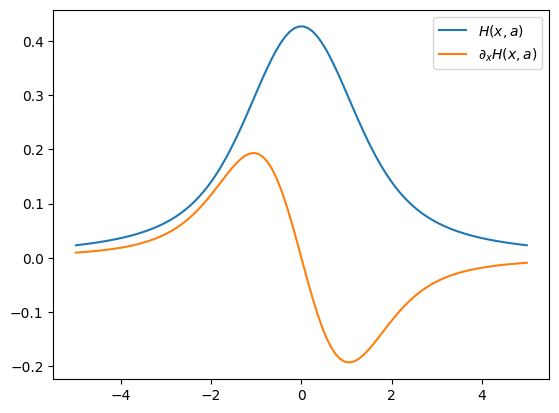

In [4]:
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt

# input vector
x = jnp.linspace(-5, 5, 100)

# vectorized hjert H(x,a)
vhjert = vmap(hjert, (0, None), 0)

# vectroized dH(x,a)/dx
vdhjert_dx = vmap(dhjert_dx, (0, None), 0)

plt.plot(x, vhjert(x, 1.0), label="$H(x,a)$")
plt.plot(x, vdhjert_dx(x, 1.0), label="$\\partial_x H(x,a)$")
plt.legend()